In [6]:
 ## 1. Import Required Libraries

# In[1]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier
from sklearn.metrics import (accuracy_score, confusion_matrix, classification_report,
                           precision_score, recall_score, f1_score, roc_curve, auc,
                           roc_auc_score, ConfusionMatrixDisplay)
from sklearn.feature_selection import SelectKBest, f_classif, chi2
import warnings
import time
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
import joblib
from collections import defaultdict

warnings.filterwarnings('ignore')

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

print("✅ All libraries imported successfully!")
print(f"📊 Pandas version: {pd.__version__}")
print(f"🔢 NumPy version: {np.__version__}")



✅ All libraries imported successfully!
📊 Pandas version: 2.3.1
🔢 NumPy version: 2.3.3


📂 Loading CICIDS2017 Dataset...
✅ Dataset loaded successfully!

📊 Dataset Shape: (692703, 79)
   • Total Samples: 692,703
   • Total Features: 79
   • Memory Usage: 417.51 MB
🔍 First 5 rows of the dataset:


,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,80,38308,1,1,6,6,6,6,6.000000,0.000000,6,6,6.000000,0.000000,3.132505e+02,52.208416,38308.000000,0.000000,38308,38308,0,0.000000,0.000000,0,0,0,0.000000,0.000000,0,0,0,0,0,0,20,20,26.104208,26.104208,6,6,6.000000,0.000000,0.000000,0,0,0,0,1,1,0,0,1,9.000000,6.000000,6.000000,20,0,0,0,0,0,0,1,6,1,6,255,946,0,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,389,479,11,5,172,326,79,0,15.636364,31.449238,163,0,65.200000,89.278777,1.039666e+06,33402.922760,31.933333,25.510409,73,0,479,47.900000,38.942836,109,1,401,100.250000,101.736178,237,3,0,0,0,0,368,176,22964.509390,10438.413360,0,163,29.294118,56.529599,3195.595588,0,0,0,1,0,0,0,0,0,31.125000,15.636364,65.200000,368,0,0,0,0,0,0,11,172,5,326,29200,260,4,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,88,1095,10,6,3150,3150,1575,0,315.000000,632.561635,1575,0,525.000000,813.326503,5.753425e+06,14611.872150,73.000000,204.960972,810,1,1095,121.666667,298.746130,915,1,995,199.000000,345.535092,810,3,0,0,0,0,336,208,9132.420091,5479.452055,0,1575,370.588235,671.751541,451250.132400,0,0,0,1,0,0,0,0,0,393.750000,315.000000,525.000000,336,0,0,0,0,0,0,10,3150,6,3150,29200,2081,3,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,389,15206,17,12,3452,6660,1313,0,203.058823,425.778474,3069,0,555.000000,977.480342,6.650007e+05,1907.141918,543.071429,2519.931377,13391,0,15206,950.375000,3322.417812,13391,2,15112,1373.818182,4176.449588,13961,3,0,0,0,0,560,388,1117.979745,789.162173,0,3069,337.066667,704.654082,496537.374700,0,0,0,1,0,0,0,0,0,348.689655,203.058823,555.000000,560,0,0,0,0,0,0,17,3452,12,6660,29200,0,10,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,88,1092,9,6,3150,3152,1575,0,350.000000,694.509719,1576,0,525.333333,813.842901,5.771062e+06,13736.263740,78.000000,207.000929,794,1,1092,136.500000,313.850738,910,1,1015,203.000000,333.240154,794,3,0,0,0,0,304,208,8241.758242,5494.505495,0,1576,393.875000,704.585067,496440.116700,0,0,0,1,0,0,0,0,0,420.133333,350.000000,525.333333,304,0,0,0,0,0,0,9,3150,6,3152,29200,2081,2,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN



📋 Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 692703 entries, 0 to 692702
Data columns (total 79 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0    Destination Port             692703 non-null  int64  
 1    Flow Duration                692703 non-null  int64  
 2    Total Fwd Packets            692703 non-null  int64  
 3    Total Backward Packets       692703 non-null  int64  
 4   Total Length of Fwd Packets   692703 non-null  int64  
 5    Total Length of Bwd Packets  692703 non-null  int64  
 6    Fwd Packet Length Max        692703 non-null  int64  
 7    Fwd Packet Length Min        692703 non-null  int64  
 8    Fwd Packet Length Mean       692703 non-null  float64
 9    Fwd Packet Length Std        692703 non-null  float64
 10  Bwd Packet Length Max         692703 non-null  int64  
 11   Bwd Packet Length Min        692703 non-null  int64  
 12   Bwd Packet Length M

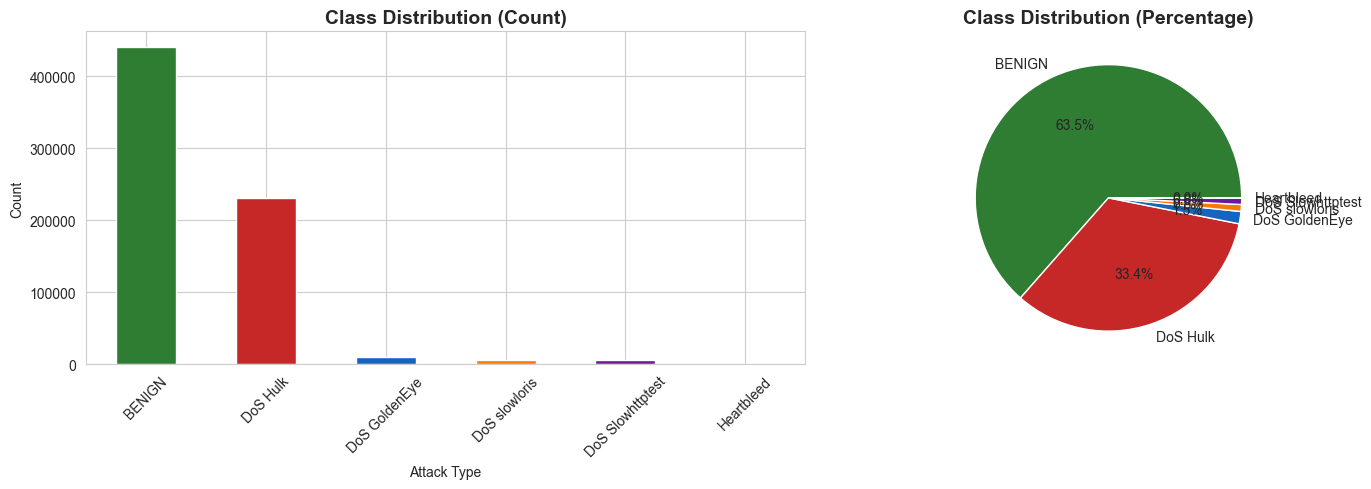

🔍 Data Quality Assessment

📊 Missing Values Analysis:
         Column  Missing_Count  Percentage
0  Flow Bytes/s           1008    0.145517

📊 Infinite Values Check:
   ⚠️ Found 1586 infinite values
Flow Bytes/s        289
 Flow Packets/s    1297
dtype: int64

📊 Duplicate Rows: 81,909


In [7]:
 ## 2. Load and Explore Dataset

# ### 2.1 Load the Dataset

# In[2]:


# Load the dataset
file_path = r'C:\Users\amity\SentinelNet\data\CICIDS2017\Wednesday-workingHours.pcap_ISCX.csv'

print("📂 Loading CICIDS2017 Dataset...")
print("="*80)

try:
    df = pd.read_csv(file_path, encoding='utf-8')
except:
    try:
        df = pd.read_csv(file_path, encoding='latin-1')
    except:
        df = pd.read_csv(file_path, encoding='iso-8859-1')

print("✅ Dataset loaded successfully!")
print(f"\n📊 Dataset Shape: {df.shape}")
print(f"   • Total Samples: {df.shape[0]:,}")
print(f"   • Total Features: {df.shape[1]}")
print(f"   • Memory Usage: {df.memory_usage().sum() / 1024**2:.2f} MB")


# ### 2.2 Initial Data Exploration

# In[3]:


# Display first few rows
print("🔍 First 5 rows of the dataset:")
print("="*80)
display(df.head())

print("\n📋 Dataset Information:")
print("="*80)
df.info()


# ### 2.3 Identify and Analyze Target Variable

# In[4]:


# Identify label column
if ' Label' in df.columns:
    label_col = ' Label'
elif 'Label' in df.columns:
    label_col = 'Label'
else:
    label_col = df.columns[-1]

print(f"🎯 Target Variable: '{label_col}'")
print("="*80)

# Analyze label distribution
print("\n📊 Class Distribution:")
label_dist = df[label_col].value_counts()
print(label_dist)

print("\n📊 Class Distribution (Percentage):")
label_dist_pct = df[label_col].value_counts(normalize=True) * 100
print(label_dist_pct.round(2))

# Visualize class distribution
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Count plot
label_dist.plot(kind='bar', ax=ax1, color=['#2E7D32', '#C62828', '#1565C0', '#F57C00', '#6A1B9A'])
ax1.set_title('Class Distribution (Count)', fontsize=14, fontweight='bold')
ax1.set_xlabel('Attack Type')
ax1.set_ylabel('Count')
ax1.tick_params(axis='x', rotation=45)

# Pie chart
colors = ['#2E7D32', '#C62828', '#1565C0', '#F57C00', '#6A1B9A', '#00838F', '#5D4037'][:len(label_dist)]
label_dist.plot(kind='pie', ax=ax2, autopct='%1.1f%%', colors=colors)
ax2.set_title('Class Distribution (Percentage)', fontsize=14, fontweight='bold')
ax2.set_ylabel('')

plt.tight_layout()
plt.show()


# ### 2.4 Check Data Quality

# In[5]:


print("🔍 Data Quality Assessment")
print("="*80)

# Check for missing values
missing_values = df.isnull().sum()
missing_pct = (missing_values / len(df)) * 100

print("\n📊 Missing Values Analysis:")
if missing_values.sum() > 0:
    missing_df = pd.DataFrame({
        'Column': missing_values[missing_values > 0].index,
        'Missing_Count': missing_values[missing_values > 0].values,
        'Percentage': missing_pct[missing_values > 0].values
    })
    print(missing_df)
else:
    print("   ✅ No missing values found!")

# Check for infinite values
print("\n📊 Infinite Values Check:")
numeric_cols = df.select_dtypes(include=[np.number]).columns
inf_count = np.isinf(df[numeric_cols]).sum()
if inf_count.sum() > 0:
    print(f"   ⚠️ Found {inf_count.sum()} infinite values")
    print(inf_count[inf_count > 0])
else:
    print("   ✅ No infinite values found!")

# Check for duplicates
print(f"\n📊 Duplicate Rows: {df.duplicated().sum():,}")


# ---


🔧 Data Preprocessing Pipeline

1️⃣ Handling Missing Values...
   ✅ Missing values handled

2️⃣ Handling Infinite Values...
   ✅ Infinite values handled
3️⃣ Removing Duplicate Rows...
   ✅ Removed 81,909 duplicate rows
   📊 Remaining rows: 610,794

4️⃣ Encoding Categorical Features...
   ℹ️ No categorical features to encode
5️⃣ Preparing Features and Target Variable...

🎯 Converting to Binary Classification (BENIGN vs ATTACK)...
   • Class 0 (Benign): 417,035 samples
   • Class 1 (Attack): 193,759 samples
   • Imbalance Ratio: 0.46:1


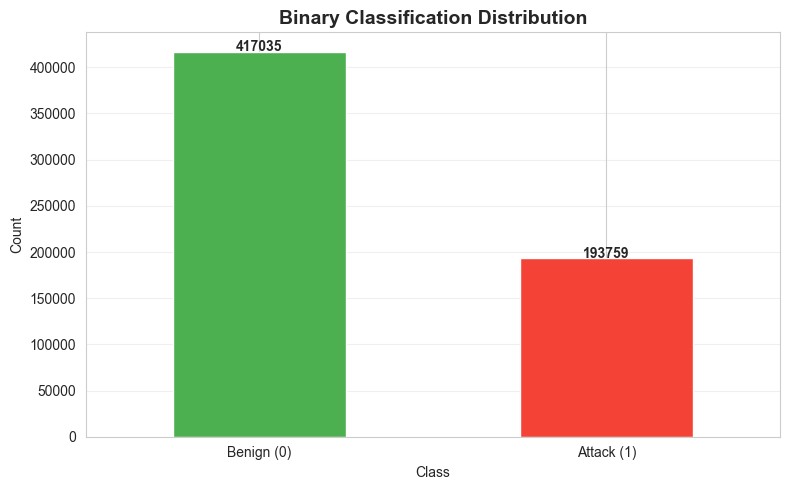

🔬 Feature Engineering

1️⃣ Removing Constant Features...
   ✅ Removed 10 constant features
   Features removed: [' Bwd PSH Flags', ' Fwd URG Flags', ' Bwd URG Flags', ' CWE Flag Count', 'Fwd Avg Bytes/Bulk']...

2️⃣ Removing Highly Correlated Features (correlation > 0.95)...
   ✅ Removed 27 highly correlated features

📊 Final Feature Set: 41 features
🎯 Feature Selection using ANOVA F-test

Selecting top 30 features...
✅ Selected 30 best features

📊 Top 10 Features by Importance Score:
                Feature         Score
  Bwd Packet Length Max 983931.826610
     Packet Length Mean 839440.351627
           Flow IAT Std 654290.870652
 Packet Length Variance 637845.399362
          Flow Duration 402506.806734
          Flow IAT Mean 188614.261266
           Fwd IAT Mean 187043.428713
         FIN Flag Count 149997.371762
  Bwd Packet Length Min  99443.468941
            Bwd IAT Std  86990.867637


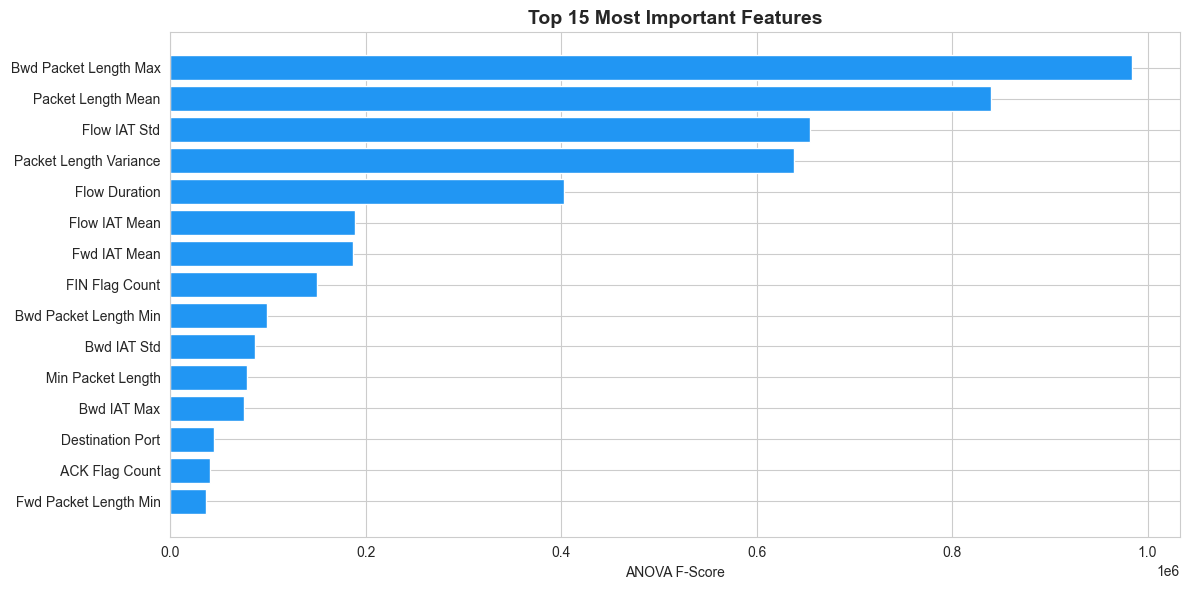

In [8]:
# ---

# ## 3. Data Preprocessing

# ### 3.1 Handle Missing and Infinite Values

# In[6]:


print("🔧 Data Preprocessing Pipeline")
print("="*80)

# Create a copy for preprocessing
df_processed = df.copy()

# Handle missing values
print("\n1️⃣ Handling Missing Values...")
numeric_columns = df_processed.select_dtypes(include=[np.number]).columns
categorical_columns = df_processed.select_dtypes(include=['object']).columns

# Fill numeric columns with median
for col in numeric_columns:
    if df_processed[col].isnull().any():
        df_processed[col].fillna(df_processed[col].median(), inplace=True)

# Fill categorical columns with mode
for col in categorical_columns:
    if col != label_col and df_processed[col].isnull().any():
        df_processed[col].fillna(df_processed[col].mode()[0], inplace=True)

print("   ✅ Missing values handled")

# Handle infinite values
print("\n2️⃣ Handling Infinite Values...")
for col in numeric_columns:
    if np.isinf(df_processed[col]).any():
        max_val = df_processed[col][np.isfinite(df_processed[col])].max()
        df_processed[col] = df_processed[col].replace([np.inf, -np.inf], max_val)

print("   ✅ Infinite values handled")


# ### 3.2 Remove Duplicates and Encode Features

# In[7]:


# Remove duplicates
print("3️⃣ Removing Duplicate Rows...")
initial_rows = len(df_processed)
df_processed = df_processed.drop_duplicates()
removed_duplicates = initial_rows - len(df_processed)
print(f"   ✅ Removed {removed_duplicates:,} duplicate rows")
print(f"   📊 Remaining rows: {len(df_processed):,}")

# Encode categorical features
print("\n4️⃣ Encoding Categorical Features...")
categorical_features = [col for col in categorical_columns if col != label_col]
if categorical_features:
    for col in categorical_features:
        le = LabelEncoder()
        df_processed[col] = le.fit_transform(df_processed[col].astype(str))
    print(f"   ✅ Encoded {len(categorical_features)} categorical features")
else:
    print("   ℹ️ No categorical features to encode")


# ### 3.3 Prepare Features and Target

# In[8]:


# Separate features and target
print("5️⃣ Preparing Features and Target Variable...")
print("="*80)

X = df_processed.drop(columns=[label_col])
y = df_processed[label_col]

# Convert to binary classification
print("\n🎯 Converting to Binary Classification (BENIGN vs ATTACK)...")
y_binary = y.apply(lambda x: 0 if x == 'BENIGN' else 1)

print(f"   • Class 0 (Benign): {(y_binary==0).sum():,} samples")
print(f"   • Class 1 (Attack): {(y_binary==1).sum():,} samples")
print(f"   • Imbalance Ratio: {(y_binary==1).sum() / (y_binary==0).sum():.2f}:1")

# Visualize binary distribution
plt.figure(figsize=(8, 5))
y_binary.value_counts().plot(kind='bar', color=['#4CAF50', '#F44336'])
plt.title('Binary Classification Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks([0, 1], ['Benign (0)', 'Attack (1)'], rotation=0)
plt.grid(axis='y', alpha=0.3)

# Add value labels on bars
for i, v in enumerate(y_binary.value_counts().values):
    plt.text(i, v + 100, str(v), ha='center', fontweight='bold')

plt.tight_layout()
plt.show()


# ### 3.4 Feature Engineering

# In[9]:


print("🔬 Feature Engineering")
print("="*80)

# Remove constant features
print("\n1️⃣ Removing Constant Features...")
constant_features = [col for col in X.columns if X[col].nunique() == 1]
if constant_features:
    X = X.drop(columns=constant_features)
    print(f"   ✅ Removed {len(constant_features)} constant features")
    print(f"   Features removed: {constant_features[:5]}..." if len(constant_features) > 5 else f"   Features removed: {constant_features}")
else:
    print("   ✅ No constant features found")

# Remove highly correlated features
print("\n2️⃣ Removing Highly Correlated Features (correlation > 0.95)...")
corr_matrix = X.corr().abs()
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.95)]
X = X.drop(columns=to_drop)
print(f"   ✅ Removed {len(to_drop)} highly correlated features")

print(f"\n📊 Final Feature Set: {X.shape[1]} features")


# ### 3.5 Feature Selection

# In[10]:


print("🎯 Feature Selection using ANOVA F-test")
print("="*80)

# Select top K features
k_features = min(30, X.shape[1])
print(f"\nSelecting top {k_features} features...")

selector = SelectKBest(f_classif, k=k_features)
X_selected = selector.fit_transform(X, y_binary)

# Get selected feature names and scores
selected_features = X.columns[selector.get_support()].tolist()
feature_scores = selector.scores_[selector.get_support()]

# Create feature importance dataframe
feature_importance_df = pd.DataFrame({
    'Feature': selected_features,
    'Score': feature_scores
}).sort_values('Score', ascending=False)

print(f"✅ Selected {k_features} best features")
print("\n📊 Top 10 Features by Importance Score:")
print(feature_importance_df.head(10).to_string(index=False))

# Visualize feature importance
plt.figure(figsize=(12, 6))
top_features = feature_importance_df.head(15)
plt.barh(range(len(top_features)), top_features['Score'].values, color='#2196F3')
plt.yticks(range(len(top_features)), top_features['Feature'].values)
plt.xlabel('ANOVA F-Score')
plt.title('Top 15 Most Important Features', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


# ---


In [12]:
import os
import joblib
import pandas as pd

# Make sure folder exists
save_path = r'C:\Users\amity\SentinelNet\notebooks\data'
os.makedirs(save_path, exist_ok=True)

# 1️⃣ Save df_processed (after cleaning + encoding)
df_processed.to_csv(os.path.join(save_path, 'cicids2017_processed.csv'), index=False)

# 2️⃣ Save X_selected and y_binary (after feature selection)
X_selected_df = pd.DataFrame(X_selected, columns=selected_features)
X_selected_df['Label'] = y_binary.values
X_selected_df.to_csv(os.path.join(save_path, 'X_selected.csv'), index=False)

# 3️⃣ Optionally save NumPy arrays for ML (fast loading later)
joblib.dump(X_selected, os.path.join(save_path, 'X_selected.pkl'))
joblib.dump(y_binary.values, os.path.join(save_path, 'y_binary.pkl'))

print("✅ Preprocessed and selected data saved successfully in:")
print(save_path)


✅ Preprocessed and selected data saved successfully in:
C:\Users\amity\SentinelNet\notebooks\data


📊 Data Splitting Strategy
✅ Data Split Complete!

📊 Dataset Sizes:
   • Training Set:   342,044 samples (56.0%)
   • Validation Set: 146,591 samples (24.0%)
   • Test Set:       122,159 samples (20.0%)

📊 Class Distribution in Sets:
   • Train - Benign: 233,539, Attack: 108,505
   • Val   - Benign: 100,089, Attack: 46,502
   • Test  - Benign: 83,407, Attack: 38,752
⚖️ Handling Class Imbalance

📊 Original Training Set Distribution:
   • Benign: 233,539
   • Attack: 108,505
   • Ratio: 1:0.46

🔄 Applying Random UnderSampling...

✅ Balanced Training Set Distribution:
   • Benign: 217,010
   • Attack: 108,505
   • Ratio: 1:0.50


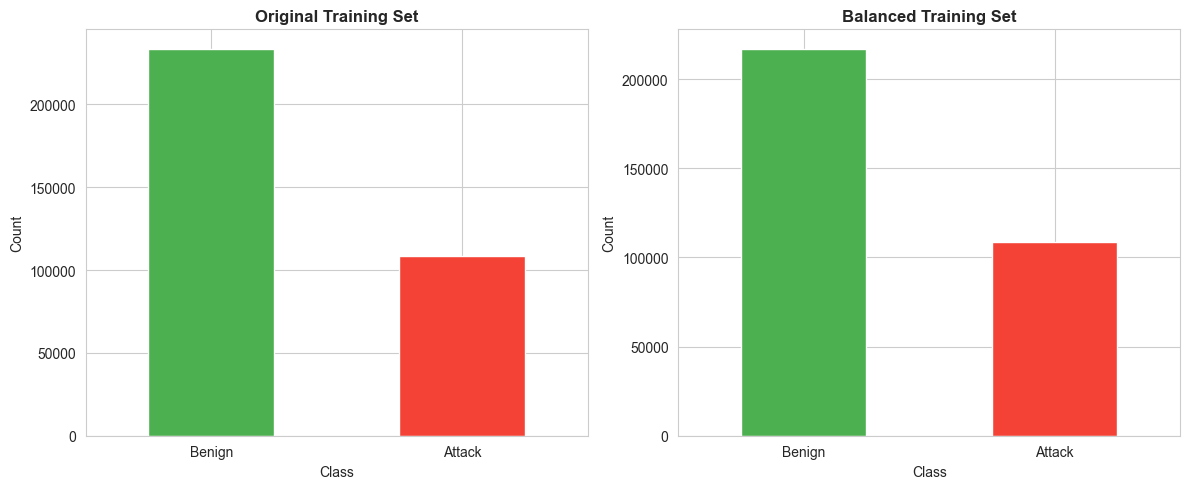

📏 Feature Scaling

🔄 Applying StandardScaler...
✅ Features scaled successfully!

📊 Scaled Data Statistics:
   • Mean ≈ 0: 0.000000
   • Std  ≈ 1: 1.000000


In [9]:
# ---

# ## 4. Data Splitting and Balancing

# ### 4.1 Train-Validation-Test Split

# In[11]:


print("📊 Data Splitting Strategy")
print("="*80)

# First split: Train+Val (80%) and Test (20%)
X_temp, X_test, y_temp, y_test = train_test_split(
    X_selected, y_binary, test_size=0.2, random_state=42, stratify=y_binary
)

# Second split: Train (70% of 80% = 56%) and Validation (30% of 80% = 24%)
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.3, random_state=42, stratify=y_temp
)

print("✅ Data Split Complete!")
print(f"\n📊 Dataset Sizes:")
print(f"   • Training Set:   {X_train.shape[0]:,} samples ({(len(X_train)/len(X_selected))*100:.1f}%)")
print(f"   • Validation Set: {X_val.shape[0]:,} samples ({(len(X_val)/len(X_selected))*100:.1f}%)")
print(f"   • Test Set:       {X_test.shape[0]:,} samples ({(len(X_test)/len(X_selected))*100:.1f}%)")

print(f"\n📊 Class Distribution in Sets:")
print(f"   • Train - Benign: {(y_train==0).sum():,}, Attack: {(y_train==1).sum():,}")
print(f"   • Val   - Benign: {(y_val==0).sum():,}, Attack: {(y_val==1).sum():,}")
print(f"   • Test  - Benign: {(y_test==0).sum():,}, Attack: {(y_test==1).sum():,}")


# ### 4.2 Handle Class Imbalance

# In[12]:


print("⚖️ Handling Class Imbalance")
print("="*80)

print(f"\n📊 Original Training Set Distribution:")
print(f"   • Benign: {(y_train==0).sum():,}")
print(f"   • Attack: {(y_train==1).sum():,}")
print(f"   • Ratio: 1:{((y_train==1).sum()/(y_train==0).sum()):.2f}")

# Apply undersampling for faster training
print("\n🔄 Applying Random UnderSampling...")
rus = RandomUnderSampler(random_state=42, sampling_strategy=0.5)
X_train_balanced, y_train_balanced = rus.fit_resample(X_train, y_train)

print(f"\n✅ Balanced Training Set Distribution:")
print(f"   • Benign: {(y_train_balanced==0).sum():,}")
print(f"   • Attack: {(y_train_balanced==1).sum():,}")
print(f"   • Ratio: 1:{((y_train_balanced==1).sum()/(y_train_balanced==0).sum()):.2f}")

# Visualize the balancing effect
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Original distribution
y_train.value_counts().plot(kind='bar', ax=ax1, color=['#4CAF50', '#F44336'])
ax1.set_title('Original Training Set', fontsize=12, fontweight='bold')
ax1.set_xlabel('Class')
ax1.set_ylabel('Count')
ax1.set_xticklabels(['Benign', 'Attack'], rotation=0)

# Balanced distribution
pd.Series(y_train_balanced).value_counts().plot(kind='bar', ax=ax2, color=['#4CAF50', '#F44336'])
ax2.set_title('Balanced Training Set', fontsize=12, fontweight='bold')
ax2.set_xlabel('Class')
ax2.set_ylabel('Count')
ax2.set_xticklabels(['Benign', 'Attack'], rotation=0)

plt.tight_layout()
plt.show()


# ### 4.3 Feature Scaling

# In[13]:


print("📏 Feature Scaling")
print("="*80)

print("\n🔄 Applying StandardScaler...")

# Initialize and fit scaler on training data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_balanced)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

print("✅ Features scaled successfully!")
print(f"\n📊 Scaled Data Statistics:")
print(f"   • Mean ≈ 0: {np.abs(X_train_scaled.mean()).max():.6f}")
print(f"   • Std  ≈ 1: {X_train_scaled.std().mean():.6f}")


# ---


In [10]:
# ---

# ## 5. Model Training and Evaluation

# ### 5.1 Initialize Models

# In[14]:


print("🤖 Initializing Machine Learning Models")
print("="*80)

# Define models with optimized hyperparameters
models = {
    'Logistic Regression': LogisticRegression(
        max_iter=1000,
        solver='saga',
        C=1.0,
        class_weight='balanced',
        random_state=42,
        n_jobs=-1
    ),
    
    'Decision Tree': DecisionTreeClassifier(
        max_depth=10,
        min_samples_split=50,
        min_samples_leaf=20,
        class_weight='balanced',
        random_state=42
    ),
    
    'Histogram Gradient Boosting': HistGradientBoostingClassifier(
        max_iter=100,
        max_depth=10,
        learning_rate=0.1,
        random_state=42,
        early_stopping=True,
        n_iter_no_change=10,
        validation_fraction=0.2
    ),
    
    'Random Forest': RandomForestClassifier(
        n_estimators=100,
        max_depth=15,
        min_samples_split=20,
        min_samples_leaf=10,
        class_weight='balanced',
        random_state=42,
        n_jobs=-1
    )
}

print("✅ Models initialized with optimized hyperparameters")
print(f"\n📊 Models to train: {list(models.keys())}")


# ### 5.2 Train Models and Evaluate

# In[15]:


print("🚀 Training and Evaluating Models")
print("="*80)

# Store results
results = {}
training_history = defaultdict(dict)

for model_name, model in models.items():
    print(f"\n{'='*60}")
    print(f"Training: {model_name}")
    print(f"{'='*60}")
    
    # Training time
    start_time = time.time()
    
    # Train model
    model.fit(X_train_scaled, y_train_balanced)
    
    # Training time
    train_time = time.time() - start_time
    
    # Get predictions and probabilities for all sets
    # Training set
    y_train_pred = model.predict(X_train_scaled)
    y_train_proba = model.predict_proba(X_train_scaled)[:, 1] if hasattr(model, 'predict_proba') else None
    train_acc = accuracy_score(y_train_balanced, y_train_pred)
    
    # Validation set
    y_val_pred = model.predict(X_val_scaled)
    y_val_proba = model.predict_proba(X_val_scaled)[:, 1] if hasattr(model, 'predict_proba') else None
    val_acc = accuracy_score(y_val, y_val_pred)
    
    # Test set
    y_test_pred = model.predict(X_test_scaled)
    y_test_proba = model.predict_proba(X_test_scaled)[:, 1] if hasattr(model, 'predict_proba') else None
    test_acc = accuracy_score(y_test, y_test_pred)
    
    # Calculate detailed metrics for test set
    precision = precision_score(y_test, y_test_pred, average='weighted')
    recall = recall_score(y_test, y_test_pred, average='weighted')
    f1 = f1_score(y_test, y_test_pred, average='weighted')
    
    # Confusion matrix for test set
    cm = confusion_matrix(y_test, y_test_pred)
    tn, fp, fn, tp = cm.ravel()
    
    # Calculate rates
    tpr = tp / (tp + fn) if (tp + fn) > 0 else 0
    tnr = tn / (tn + fp) if (tn + fp) > 0 else 0
    fpr = fp / (fp + tn) if (fp + tn) > 0 else 0
    fnr = fn / (fn + tp) if (fn + tp) > 0 else 0
    
    # Calculate AUC if probabilities available
    if y_test_proba is not None:
        auc_score = roc_auc_score(y_test, y_test_proba)
    else:
        auc_score = None
    
    # Store results
    results[model_name] = {
        'model': model,
        'train_acc': train_acc,
        'val_acc': val_acc,
        'test_acc': test_acc,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'confusion_matrix': cm,
        'train_time': train_time,
        'y_test_pred': y_test_pred,
        'y_test_proba': y_test_proba,
        'y_val_pred': y_val_pred,
        'y_val_proba': y_val_proba,
        'auc': auc_score,
        'tpr': tpr,
        'tnr': tnr,
        'fpr': fpr,
        'fnr': fnr
    }
    
    # Display results
    print(f"\n⏱️ Training Time: {train_time:.2f} seconds")
    
    print(f"\n📊 ACCURACY SCORES:")
    print(f"   • Training Accuracy:   {train_acc*100:.2f}%")
    print(f"   • Validation Accuracy: {val_acc*100:.2f}%")
    print(f"   • Test Accuracy:       {test_acc*100:.2f}%")
    
    print(f"\n📈 TEST SET METRICS:")
    print(f"   • Precision: {precision:.4f}")
    print(f"   • Recall:    {recall:.4f}")
    print(f"   • F1-Score:  {f1:.4f}")
    if auc_score:
        print(f"   • AUC-ROC:   {auc_score:.4f}")
    
    print(f"\n🎯 CONFUSION MATRIX BREAKDOWN:")
    print(f"   • True Negatives (TN):  {tn:,}")
    print(f"   • True Positives (TP):  {tp:,}")
    print(f"   • False Positives (FP): {fp:,}")
    print(f"   • False Negatives (FN): {fn:,}")


# ---


🤖 Initializing Machine Learning Models
✅ Models initialized with optimized hyperparameters

📊 Models to train: ['Logistic Regression', 'Decision Tree', 'Histogram Gradient Boosting', 'Random Forest']
🚀 Training and Evaluating Models

Training: Logistic Regression

⏱️ Training Time: 733.47 seconds

📊 ACCURACY SCORES:
   • Training Accuracy:   98.00%
   • Validation Accuracy: 97.99%
   • Test Accuracy:       98.00%

📈 TEST SET METRICS:
   • Precision: 0.9803
   • Recall:    0.9800
   • F1-Score:  0.9801
   • AUC-ROC:   0.9983

🎯 CONFUSION MATRIX BREAKDOWN:
   • True Negatives (TN):  81,710
   • True Positives (TP):  38,007
   • False Positives (FP): 1,697
   • False Negatives (FN): 745

Training: Decision Tree

⏱️ Training Time: 27.60 seconds

📊 ACCURACY SCORES:
   • Training Accuracy:   99.63%
   • Validation Accuracy: 99.64%
   • Test Accuracy:       99.64%

📈 TEST SET METRICS:
   • Precision: 0.9964
   • Recall:    0.9964
   • F1-Score:  0.9964
   • AUC-ROC:   0.9996

🎯 CONFUSION MATR

In [11]:
import os
import joblib

# Directory to save models
save_dir = "C:/Users/amity/SentinelNet/models/cicids2017"
os.makedirs(save_dir, exist_ok=True)

# Save each trained model
for name, data in results.items():
    model = data['model']
    filename = f"{save_dir}/{name.replace(' ', '_').lower()}.pkl"
    joblib.dump(model, filename)
    print(f"✅ Saved: {filename}")

# Save the scaler (important for Streamlit input preprocessing)
joblib.dump(scaler, f"{save_dir}/scaler.pkl")
print("✅ Scaler saved")


✅ Saved: C:/Users/amity/SentinelNet/models/cicids2017/logistic_regression.pkl
✅ Saved: C:/Users/amity/SentinelNet/models/cicids2017/decision_tree.pkl
✅ Saved: C:/Users/amity/SentinelNet/models/cicids2017/histogram_gradient_boosting.pkl
✅ Saved: C:/Users/amity/SentinelNet/models/cicids2017/random_forest.pkl
✅ Scaler saved


<!-- hwiucdisu bjwechdsj b -->

📊 Model Performance Comparison


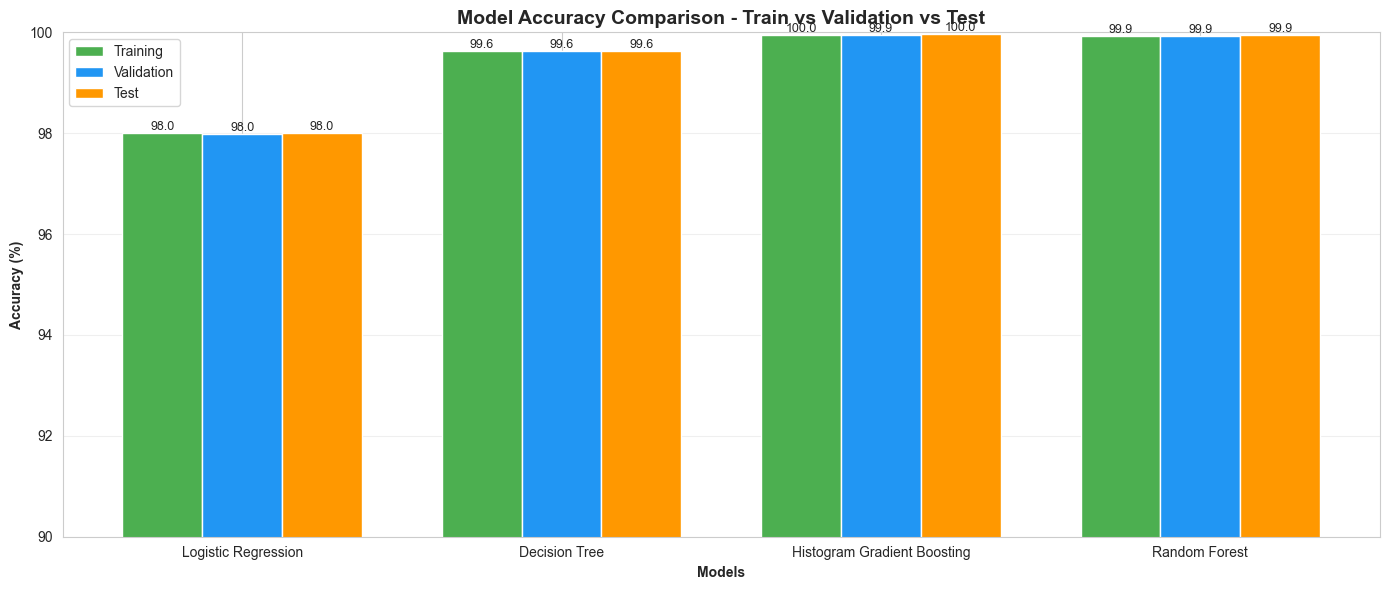

In [52]:
import matplotlib.pyplot as plt
import numpy as np

print("📊 Model Performance Comparison")
print("="*80)

# Prepare data
models_list = list(results.keys())
x = np.arange(len(models_list))
width = 0.25

train_accs = [results[m]['train_acc']*100 for m in models_list]
val_accs = [results[m]['val_acc']*100 for m in models_list]
test_accs = [results[m]['test_acc']*100 for m in models_list]

# Plot
fig, ax = plt.subplots(figsize=(14, 6))
bars1 = ax.bar(x - width, train_accs, width, label='Training', color='#4CAF50')
bars2 = ax.bar(x, val_accs, width, label='Validation', color='#2196F3')
bars3 = ax.bar(x + width, test_accs, width, label='Test', color='#FF9800')

ax.set_xlabel('Models', fontweight='bold')
ax.set_ylabel('Accuracy (%)', fontweight='bold')
ax.set_title('Model Accuracy Comparison - Train vs Validation vs Test', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(models_list)
ax.legend()
ax.grid(axis='y', alpha=0.3)
ax.set_ylim([90, 100])

# Add value labels on bars
for bars in [bars1, bars2, bars3]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.1f}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()


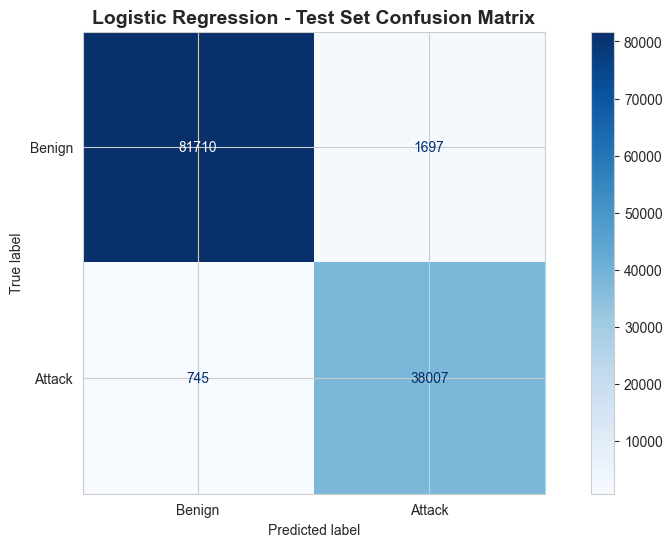

In [55]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

model_name = 'Logistic Regression'
cm = results[model_name]['confusion_matrix']

# Display confusion matrix with counts only
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Benign', 'Attack'])
disp.plot(cmap='Blues', values_format='d')

plt.title(f'{model_name} - Test Set Confusion Matrix', fontsize=14, fontweight='bold')
plt.show()


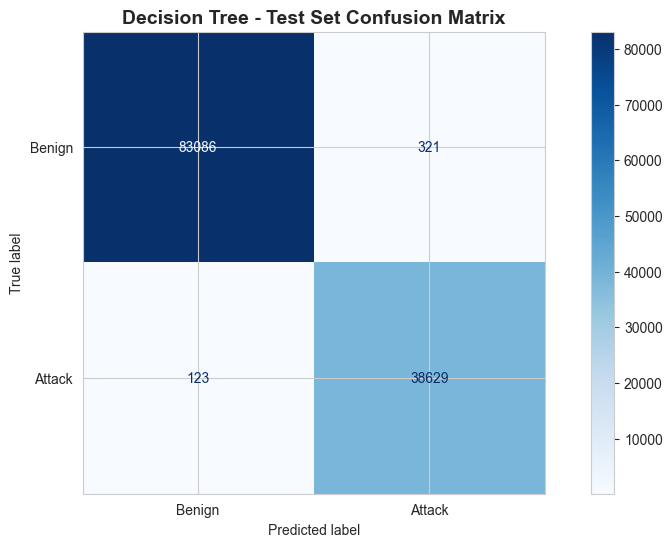

In [54]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

model_name = 'Decision Tree'
cm = results[model_name]['confusion_matrix']

# Display confusion matrix with counts only
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Benign', 'Attack'])
disp.plot(cmap='Blues', values_format='d')

plt.title(f'{model_name} - Test Set Confusion Matrix', fontsize=14, fontweight='bold')
plt.show()


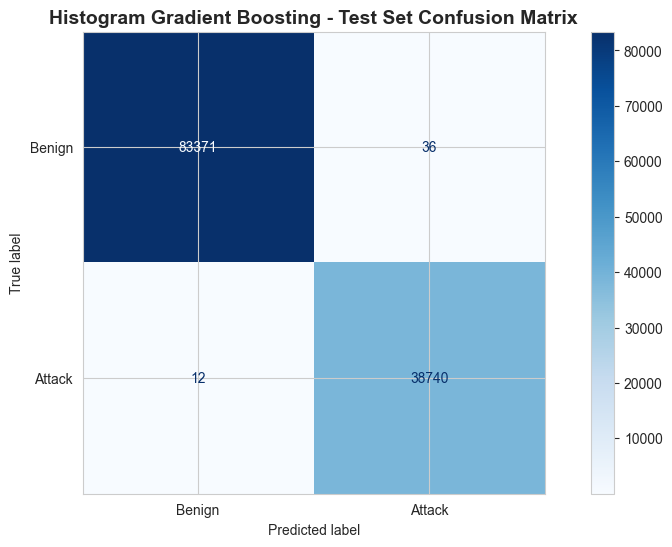

In [56]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

model_name = 'Histogram Gradient Boosting'
cm = results[model_name]['confusion_matrix']

# Display confusion matrix with counts only
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Benign', 'Attack'])
disp.plot(cmap='Blues', values_format='d')

plt.title(f'{model_name} - Test Set Confusion Matrix', fontsize=14, fontweight='bold')
plt.show()


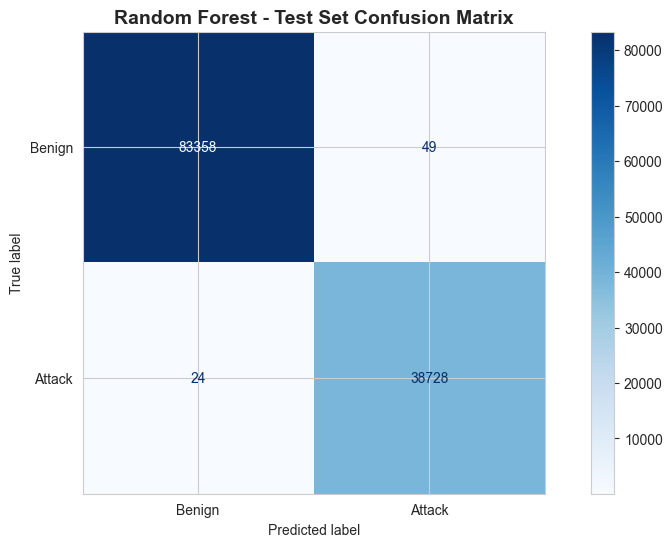

In [57]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

model_name = 'Random Forest'
cm = results[model_name]['confusion_matrix']

# Display confusion matrix with counts only
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Benign', 'Attack'])
disp.plot(cmap='Blues', values_format='d')

plt.title(f'{model_name} - Test Set Confusion Matrix', fontsize=14, fontweight='bold')
plt.show()


📊 Combined Predicted Probabilities Box Plot for Test Set (All Models)


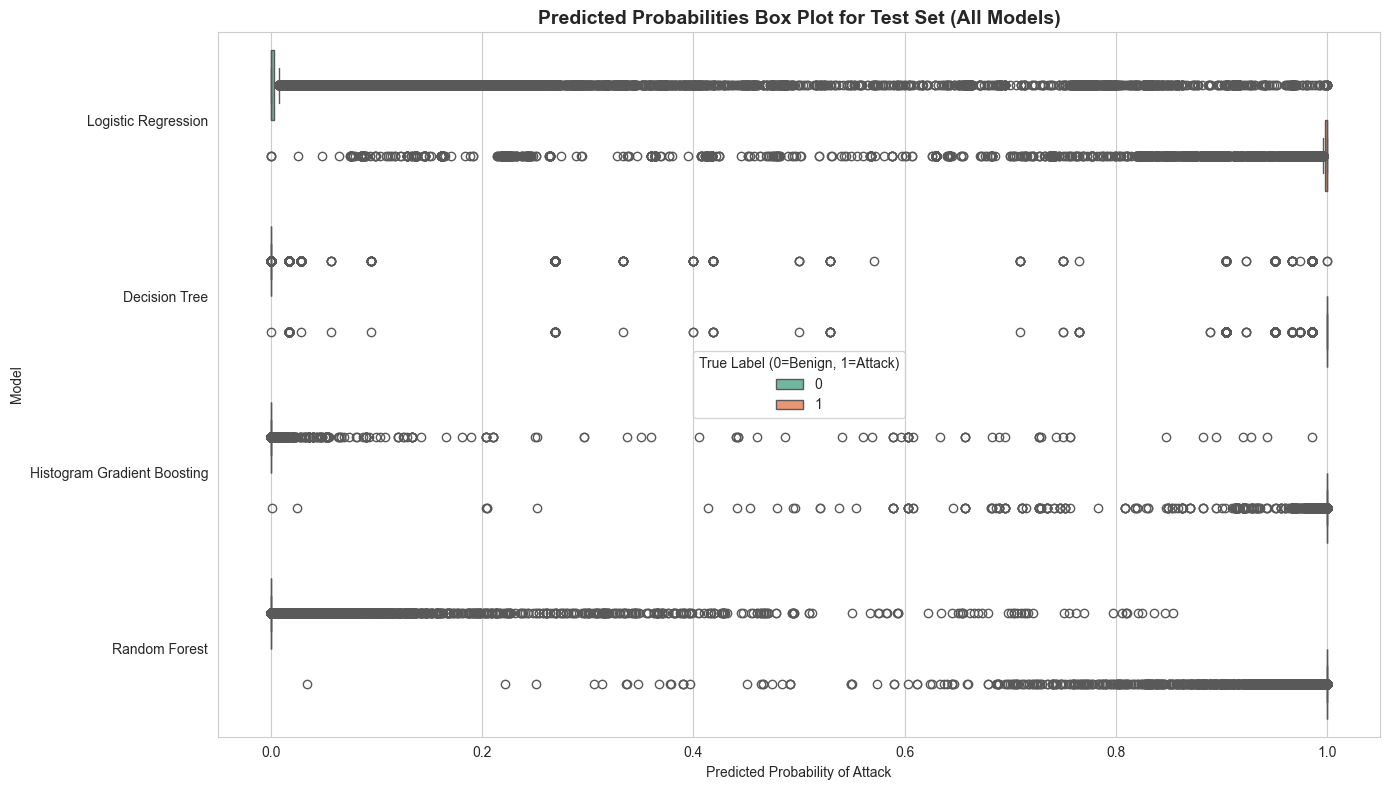

In [58]:
print("📊 Combined Predicted Probabilities Box Plot for Test Set (All Models)")
print("="*80)

plot_data = []

# Collect probability predictions from all models
for model_name, model_info in results.items():
    y_test_proba = model_info['y_test_proba']
    for true, pred in zip(y_test, y_test_proba):
        plot_data.append([model_name, true, pred])

# Convert to DataFrame
proba_df = pd.DataFrame(plot_data, columns=["Model", "True Label", "Predicted Probability"])

plt.figure(figsize=(14, 8))
sns.boxplot(
    x="Predicted Probability", 
    y="Model", 
    hue="True Label", 
    data=proba_df, 
    orient="h", 
    palette="Set2"
)
plt.title("Predicted Probabilities Box Plot for Test Set (All Models)", fontsize=14, fontweight="bold")
plt.xlabel("Predicted Probability of Attack")
plt.ylabel("Model")
plt.legend(title="True Label (0=Benign, 1=Attack)")
plt.tight_layout()
plt.show()


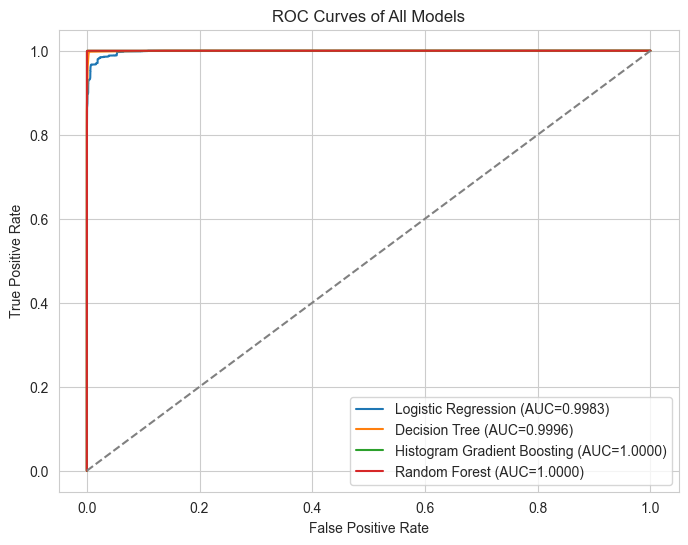

In [60]:
from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(8,6))

for model_name, model_info in results.items():
    if model_info['y_test_proba'] is not None:
        fpr, tpr, _ = roc_curve(y_test, model_info['y_test_proba'])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f"{model_name} (AUC={roc_auc:.4f})")

plt.plot([0,1], [0,1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves of All Models")
plt.legend(loc="lower right")
plt.show()


In [61]:
print(df.columns.tolist())


[' Destination Port', ' Flow Duration', ' Total Fwd Packets', ' Total Backward Packets', 'Total Length of Fwd Packets', ' Total Length of Bwd Packets', ' Fwd Packet Length Max', ' Fwd Packet Length Min', ' Fwd Packet Length Mean', ' Fwd Packet Length Std', 'Bwd Packet Length Max', ' Bwd Packet Length Min', ' Bwd Packet Length Mean', ' Bwd Packet Length Std', 'Flow Bytes/s', ' Flow Packets/s', ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min', 'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max', ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std', ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags', ' Bwd PSH Flags', ' Fwd URG Flags', ' Bwd URG Flags', ' Fwd Header Length', ' Bwd Header Length', 'Fwd Packets/s', ' Bwd Packets/s', ' Min Packet Length', ' Max Packet Length', ' Packet Length Mean', ' Packet Length Std', ' Packet Length Variance', 'FIN Flag Count', ' SYN Flag Count', ' RST Flag Count', ' PSH Flag Count', ' ACK Flag Count', ' URG Flag 

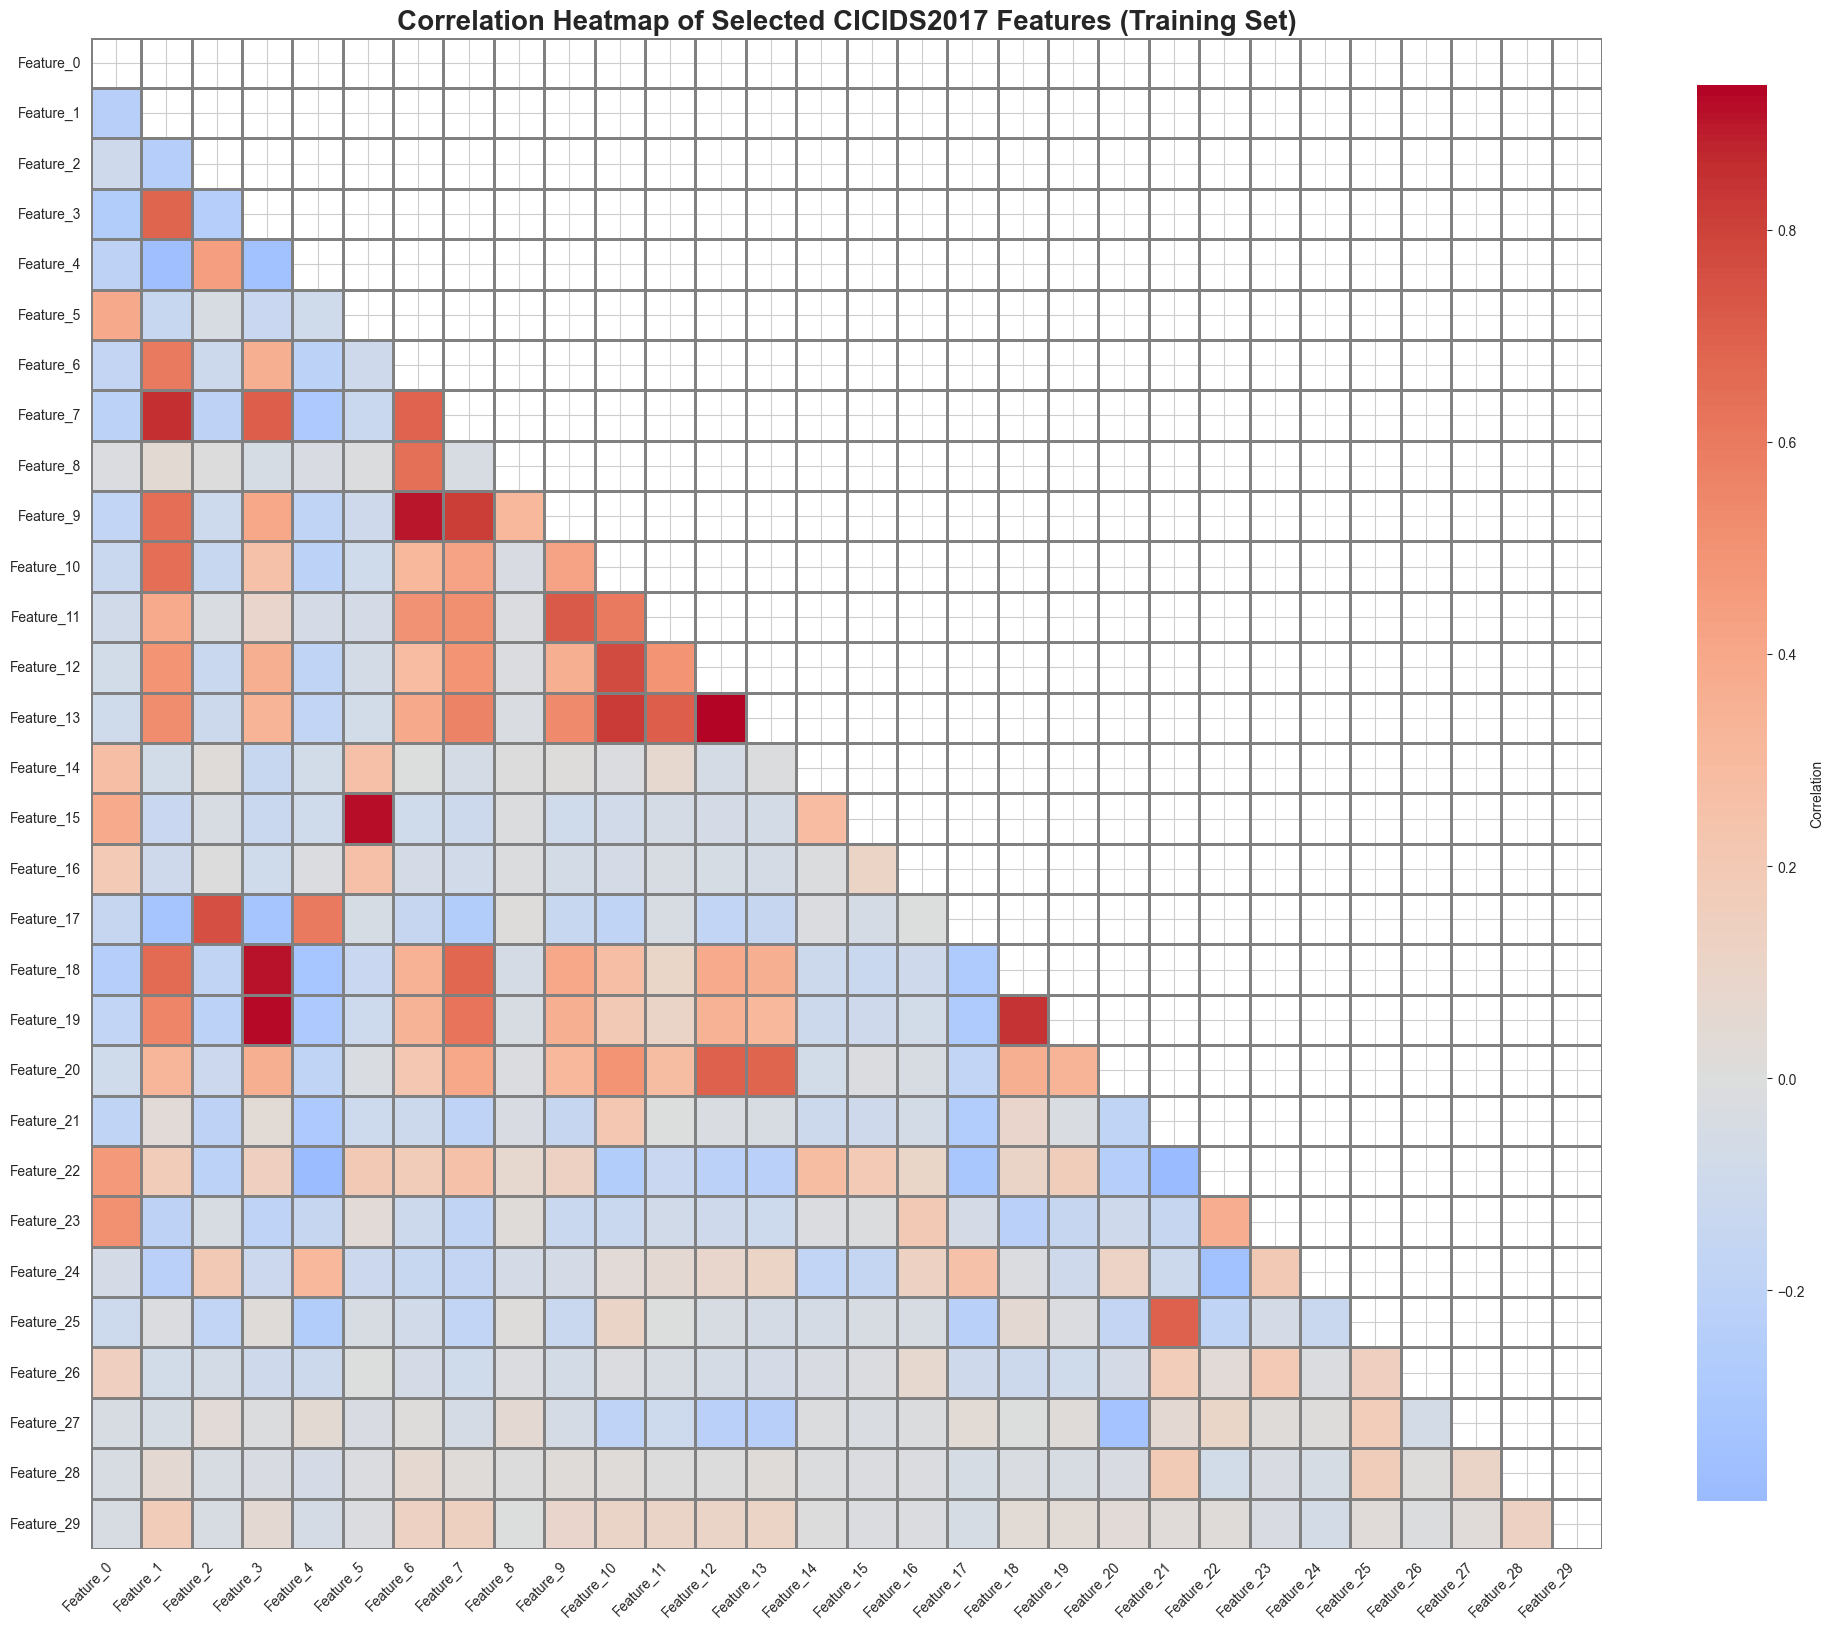

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Suppose X_train_df is your training set as DataFrame with proper feature names
# Ensure it has the exact feature names used for training
# For example, if X_train is numpy array after preprocessing:
# feature_names_selected = [list of selected features actually used in training]
# X_train_df = pd.DataFrame(X_train, columns=feature_names_selected)

# Compute correlation matrix
corr_matrix = X_train_df.corr()

# Mask upper triangle to reduce clutter
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Plot heatmap
plt.figure(figsize=(20, 18))
sns.heatmap(
    corr_matrix,
    mask=mask,
    cmap="coolwarm",
    center=0,
    annot=False,                  # True for showing numeric correlation values
    linewidths=0.8,
    linecolor='gray',
    cbar_kws={"shrink": 0.8, "label": "Correlation"},
    square=True
)

# Use actual feature names for x and y axes
plt.xticks(ticks=np.arange(len(corr_matrix.columns)) + 0.5,
           labels=[c.strip() for c in corr_matrix.columns],
           rotation=45, ha='right', fontsize=10)
plt.yticks(ticks=np.arange(len(corr_matrix.columns)) + 0.5,
           labels=[c.strip() for c in corr_matrix.columns],
           rotation=0, fontsize=10)

plt.title("Correlation Heatmap of Selected CICIDS2017 Features (Training Set)",
          fontsize=20, fontweight="bold")
plt.tight_layout()
plt.show()


In [63]:
import pandas as pd

# Prepare clean comparison table
comparison_data = []
for model_name, metrics in results.items():
    tn, fp, fn, tp = metrics['confusion_matrix'].ravel()
    tpr = metrics['tpr']  # Sensitivity / Recall
    tnr = metrics['tnr']  # Specificity
    
    comparison_data.append({
        'Model': model_name,
        'Train Accuracy (%)': metrics['train_acc']*100,
        'Validation Accuracy (%)': metrics['val_acc']*100,
        'Test Accuracy (%)': metrics['test_acc']*100,
        'Sensitivity (Recall)': tpr,
        'Specificity': tnr,
        'Precision': metrics['precision'],
        'F1-Score': metrics['f1'],
        'AUC': metrics['auc'] if metrics['auc'] else None
    })

comparison_df = pd.DataFrame(comparison_data)

# Style the table for notebook display
styled_df = (comparison_df.style
             .format({
                 'Train Accuracy (%)': '{:.2f}%',
                 'Validation Accuracy (%)': '{:.2f}%',
                 'Test Accuracy (%)': '{:.2f}%',
                 'Sensitivity (Recall)': '{:.4f}',
                 'Specificity': '{:.4f}',
                 'Precision': '{:.4f}',
                 'F1-Score': '{:.4f}',
                 'AUC': '{:.4f}'
             })
             .set_caption("📊 CICIDS2017 Model Performance Summary")
             .set_table_styles([
                 {'selector': 'th', 'props': [('background-color', '#4CAF50'),
                                               ('color', 'white'),
                                               ('font-weight', 'bold'),
                                               ('text-align', 'center')]},
                 {'selector': 'td', 'props': [('text-align', 'center')]}
             ])
             .hide(axis='index')  # <- Updated for new Pandas
            )

styled_df


Model,Train Accuracy (%),Validation Accuracy (%),Test Accuracy (%),Sensitivity (Recall),Specificity,Precision,F1-Score,AUC
Logistic Regression,98.00%,97.99%,98.00%,0.9808,0.9797,0.9803,0.9801,0.9983
Decision Tree,99.63%,99.64%,99.64%,0.9968,0.9962,0.9964,0.9964,0.9996
Histogram Gradient Boosting,99.95%,99.95%,99.96%,0.9997,0.9996,0.9996,0.9996,1.0000
Random Forest,99.93%,99.93%,99.94%,0.9994,0.9994,0.9994,0.9994,1.0000
